In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "New VegNet",
    shuffle = True,
    image_size = (256,256),
    batch_size =32,
)
    

Found 6150 files belonging to 4 classes.


In [3]:
dataset.class_names
batch_size=  32

In [4]:
len(dataset)

193

In [5]:
dataset
class_names= dataset.class_names
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    


(32, 256, 256, 3)
[3 2 3 0 3 3 3 3 1 3 2 3 2 1 3 0 3 2 2 1 1 3 3 3 3 0 2 3 1 2 0 3]


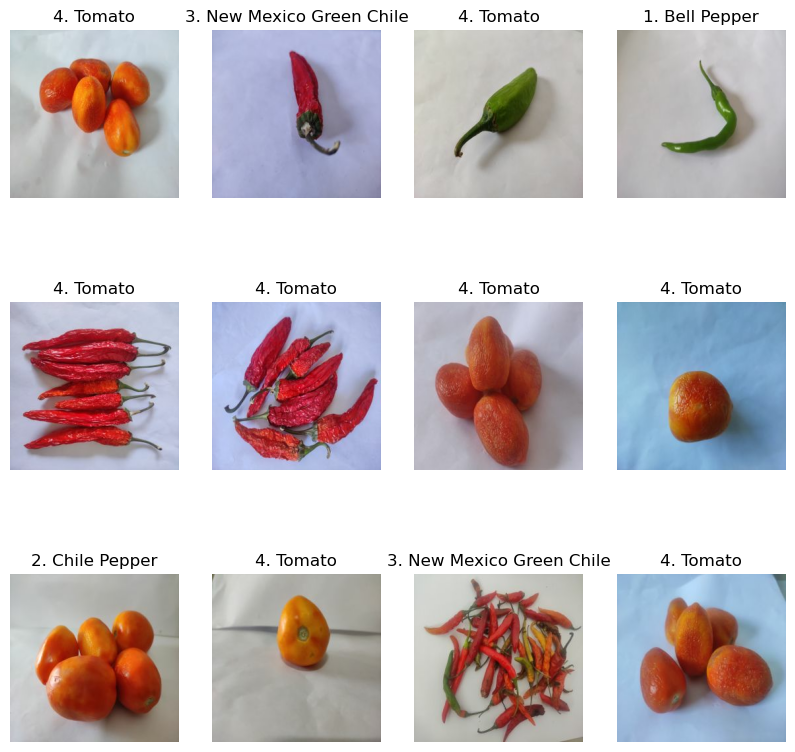

In [6]:

plt.figure(figsize = (10,10))
for image_batch , labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")



In [7]:
len(dataset)

193

In [8]:
train_size= 0.8
len(dataset)*train_size

154.4

In [9]:
test_size=0.1
len(dataset)*test_size

19.3

In [10]:
val_size= 0.1
len(dataset)*val_size

19.3

In [11]:
train_ds = dataset.take(154)
len(train_ds)

154

In [12]:
test_ds = dataset.skip(154)
len(test_ds)

39

In [13]:
val_size = 0.1
len(dataset)*val_size
val_ds = dataset.take(19)
len(val_ds)

19

In [ ]:
test_ds = test_ds.skip(19)
len(test_ds)
test_ds = test_ds.take(20)
len(test_ds)


In [14]:
len(train_ds),len(test_ds),len(val_ds)

(154, 39, 19)

In [15]:
from tensorflow.keras import layers, Sequential

image_size = 256 
resize = Sequential([
    layers.Resizing(width=image_size, height=image_size),
    layers.Rescaling(1./255)
])
    


In [16]:
#data agumentation 
data_agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizental_and_verticle"),
    layers.RandomRotation(0.2),
    ])


In [17]:
train_ds = train_ds.map(
    lambda x, y: (data_agumentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential , layers , models

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
n_classes = 4

# Define the Sequential model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

                               

C:\Users\gurud\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(
    optimizer= "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),metrics=["accuracy"])


In [ ]:
history = model.fit(train_ds , epochs = 10 , batch_size = 32 ,validation_data = val_ds , verbose =1  )

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9744 - loss: 0.0707 - val_accuracy: 0.9622 - val_loss: 0.1185
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.9714 - loss: 0.0811 - val_accuracy: 0.9655 - val_loss: 0.0703
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.9715 - loss: 0.0694 - val_accuracy: 0.9836 - val_loss: 0.0583
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.9773 - loss: 0.0671 - val_accuracy: 0.9836 - val_loss: 0.0459
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 464s 3s/step - accuracy: 0.9752 - loss: 0.0801 - val_accuracy: 0.9753 - val_loss: 0.0549
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.9722 - loss: 0.0698 - val_accuracy: 0.9885 - val_loss: 0.0315
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.9819 - loss: 0.0547 - val_accuracy: 0.9046 - val_loss: 0.3320
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.9696 - loss: 0.0754 - val_accu

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
type(history.history['loss'])

In [ ]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history.['loss']
val_loss = history.history['val_loss']


In [ ]:
def predict(model , img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array , 0)
    prediction = model.predict(img_array)
    predict_class = class_names([np.argmax(prediction[0])])
    confidense = round(100*(np.max(predictions[0])),2)
    return predicted_class , confidense
    

In [ ]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
    ax =plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class,confidence = predict(model , images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"actual: {actual_class} ,\n predicted: {predicted_class} \n confidence:{confidence}%")
    plt.axis('off')


In [ ]:
def predict(model , img):
    img_array=tf.keras.preprocessing.image.image_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array , 0)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.agrmax(prediction[0])]
    confidence = round(100 *(np.max(prediction[0])),2)
    return predicted_class  , confidence
    
    
    


In [ ]:
plt.figure(figsize=(15,15))
for image , labels in test_ds.take(1):
    ax = plt.subplot(3, 3 ,i+1)
    plt.imshow(images[i].numpy.astype("unit8"))

    predicted_class ,confidence = predict(model , images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title((f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%"))
    plt.axis("off")

In [ ]:
model_version = 1
model.save(f"../models/{model_version}.keras")  # or use .h5 if you prefer
import os

model_version = 1
model_dir = "../models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
model.save(f"{model_dir}/{model_version}.keras")

In [ ]:
model.save("../potatoes.h5")